# Final Evaluation & Model Summary

This notebook presents the final evaluation of both classification and regression models.

We include:
- Visualizations such as confusion matrix and ROC curve
- Final metric interpretation
- A summary of modeling decisions and results


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image

##  Visualization of Classification Results

We visualize the final performance of the tuned logistic regression model using:

- **Confusion Matrix:** to understand the distribution of correct and incorrect predictions.
- **ROC Curve:** to assess the model’s ability to separate positive and negative classes across different thresholds.


In [36]:
import joblib

 
best_clf = joblib.load("../models/classification_model.pkl")
X_test_clf, y_test_clf = joblib.load("../models/test_data_clf.pkl")
X_test_reg, y_test_reg = joblib.load("../models/test_data_regression.pkl")

y_pred_reg = reg_pipeline.predict(X_test_reg)

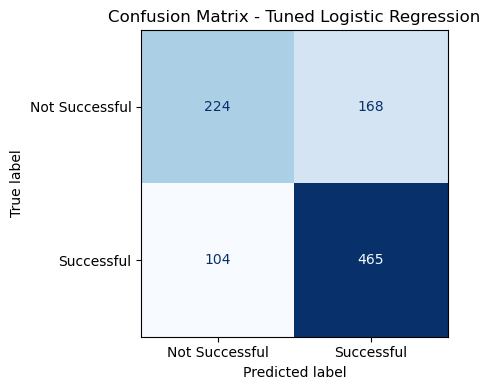

In [22]:
 
y_pred_clf = best_clf.predict(X_test_clf)
 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_clf, y_pred_clf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Successful", "Successful"])

fig, ax = plt.subplots(figsize=(6, 4))
disp.plot(ax=ax, cmap="Blues", colorbar=False)
plt.title("Confusion Matrix - Tuned Logistic Regression")
plt.tight_layout()
plt.savefig("../images/confusion_matrix.png")
plt.show()


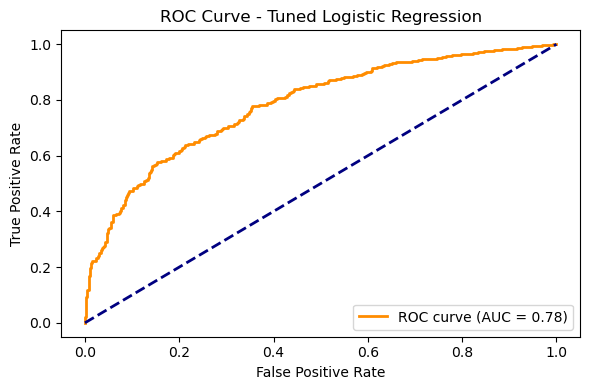

In [26]:
from sklearn.metrics import roc_curve, auc
y_proba = best_clf.predict_proba(X_test_clf)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_clf, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Tuned Logistic Regression")
plt.legend(loc="lower right")
plt.tight_layout()
plt.savefig("../images/roc_curve.png")
plt.show()

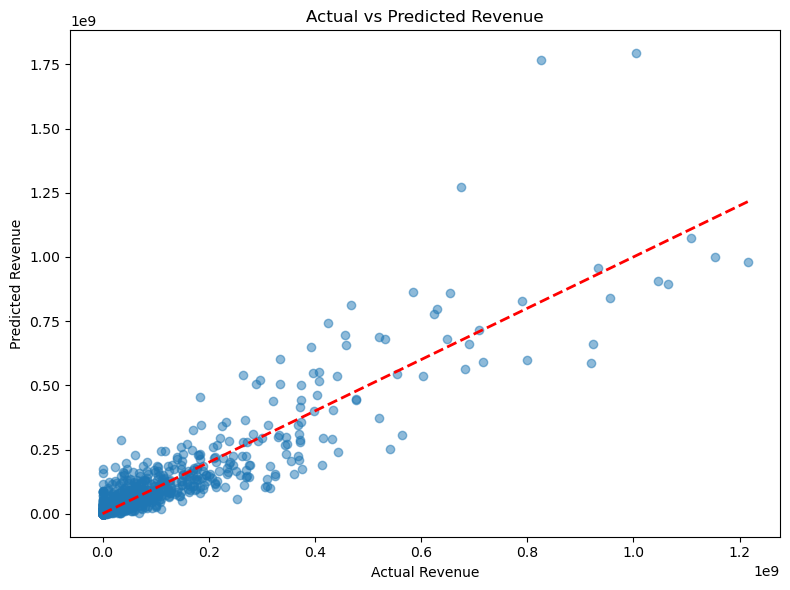

In [38]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test_reg, y_pred_reg, alpha=0.5)
plt.plot([y_test_reg.min(), y_test_reg.max()],
         [y_test_reg.min(), y_test_reg.max()], 'r--', lw=2)
plt.xlabel("Actual Revenue")
plt.ylabel("Predicted Revenue")
plt.title("Actual vs Predicted Revenue")
plt.tight_layout()
plt.savefig("../images/actual_vs_predicted.png")
plt.show()

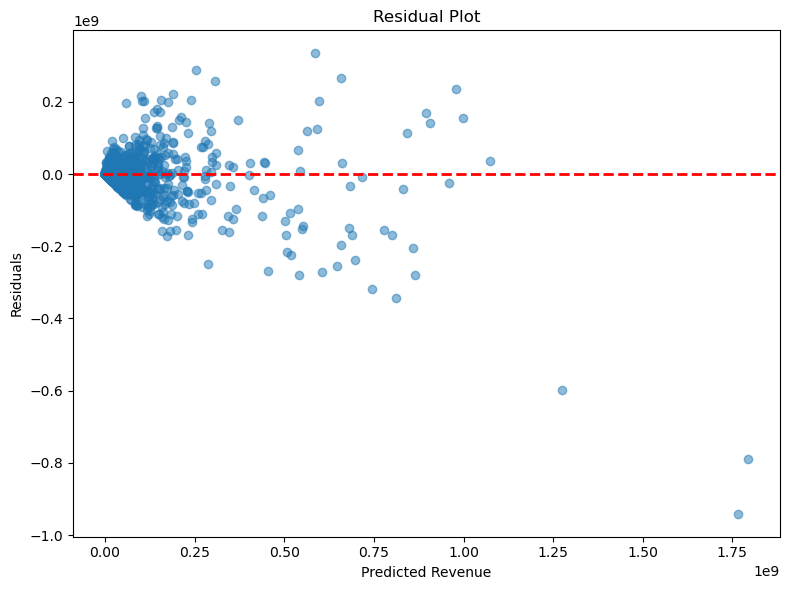

In [40]:
residuals = y_test_reg - y_pred_reg

plt.figure(figsize=(8, 6))
plt.scatter(y_pred_reg, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--', lw=2)
plt.xlabel("Predicted Revenue")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.tight_layout()
plt.savefig("../images/residual_plot.png")
plt.show()

## Final Evaluation Summary

In this notebook, we visually assessed the performance of our best-tuned models for both **classification** and **regression** tasks.

###  Classification Evaluation
- **Model**: Logistic Regression (Tuned)
- **Accuracy**: 0.72
- **Precision**: 0.71
- **Recall**: 0.72
- **F1-score**: 0.71
- **ROC AUC**: 0.7835

**Visualizations:**
- Confusion Matrix (saved as: `images/confusion_matrix.png`)
- ROC Curve (saved as: `images/roc_curve.png`)

###  Regression Evaluation
- **Model**: Random Forest Regressor (Tuned)
- **MAE**: $37.1M
- **RMSE**: $75.9M
- **R²**: 0.7780

**Visualizations:**
- Actual vs Predicted Revenue Plot (saved as: `images/actual_vs_predicted.png`)
- Residual Plot (saved as: `images/residual_plot.png`)

These results indicate that our models perform reasonably well for both predicting movie revenue and success classification based on pre-release features.
